![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Proyecto 1 - Predicción de precios de vehículos usados

En este proyecto podrán poner en práctica sus conocimientos sobre modelos predictivos basados en árboles y ensambles, y sobre la disponibilización de modelos. Para su desasrrollo tengan en cuenta las instrucciones dadas en la "Guía del proyecto 1: Predicción de precios de vehículos usados".

**Entrega**: La entrega del proyecto deberán realizarla durante la semana 4. Sin embargo, es importante que avancen en la semana 3 en el modelado del problema y en parte del informe, tal y como se les indicó en la guía.

Para hacer la entrega, deberán adjuntar el informe autocontenido en PDF a la actividad de entrega del proyecto que encontrarán en la semana 4, y subir el archivo de predicciones a la [competencia de Kaggle](https://www.kaggle.com/t/4bd64c1deb3c4ffb8ca7ff93c1f1497d).

## Datos para la predicción de precios de vehículos usados

En este proyecto se usará el conjunto de datos de Car Listings de Kaggle, donde cada observación representa el precio de un automóvil teniendo en cuenta distintas variables como: año, marca, modelo, entre otras. El objetivo es predecir el precio del automóvil. Para más detalles puede visitar el siguiente enlace: [datos](https://www.kaggle.com/jpayne/852k-used-car-listings).

## Ejemplo predicción conjunto de test para envío a Kaggle

En esta sección encontrarán el formato en el que deben guardar los resultados de la predicción para que puedan subirlos a la competencia en Kaggle.

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Importación librerías
import pandas as pd
import numpy as np

# Librerias para gráficos y visualizaciones
import matplotlib.pyplot as plt
import seaborn as sns

#Librerías para preprocesamiento y codificación
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from xgboost import XGBRegressor

import math


In [6]:
# Carga de datos de archivo .csv
dataTraining = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/dataTrain_carListings.zip')
dataTesting = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/dataTest_carListings.zip', index_col=0)

In [7]:
# Visualización datos de entrenamiento
dataTraining.head()

,Price,Year,Mileage,State,Make,Model
0,34995,2017,9913,FL,Jeep,Wrangler
1,37895,2015,20578,OH,Chevrolet,Tahoe4WD
2,18430,2012,83716,TX,BMW,X5AWD
3,24681,2014,28729,OH,Cadillac,SRXLuxury
4,26998,2013,64032,CO,Jeep,Wrangler


In [8]:
# Visualización datos de test
dataTesting.head()

,Year,Mileage,State,Make,Model
ID,,,,,
0,2014,31909,MD,Nissan,MuranoAWD
1,2017,5362,FL,Jeep,Wrangler
2,2014,50300,OH,Ford,FlexLimited
3,2004,132160,WA,BMW,5
4,2015,25226,MA,Jeep,Grand


In [9]:
dataTraining.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,400000.0,21146.919312,10753.664940,5001.0,13499.0,18450.0,26999.0,79999.0
Year,400000.0,2013.198125,3.292326,1997.0,2012.0,2014.0,2016.0,2018.0
Mileage,400000.0,55072.956895,40881.018845,5.0,25841.0,42955.0,77433.0,2457832.0


In [10]:
dataTraining.isna().sum()

Price      0
Year       0
Mileage    0
State      0
Make       0
Model      0
dtype: int64

In [11]:
dataTraining['State'] = LabelEncoder().fit_transform(dataTraining['State'])
dataTraining['Make'] = LabelEncoder().fit_transform(dataTraining['Make'])
dataTraining['Model'] = LabelEncoder().fit_transform(dataTraining['Model'])

In [12]:
dataTraining.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,400000.0,21146.919312,10753.664940,5001.0,13499.0,18450.0,26999.0,79999.0
Year,400000.0,2013.198125,3.292326,1997.0,2012.0,2014.0,2016.0,2018.0
Mileage,400000.0,55072.956895,40881.018845,5.0,25841.0,42955.0,77433.0,2457832.0
State,400000.0,24.034658,15.325588,0.0,9.0,24.0,39.0,50.0
Make,400000.0,15.833530,10.299097,0.0,8.0,13.0,20.0,37.0
Model,400000.0,254.827082,148.634414,0.0,124.0,248.0,404.0,524.0


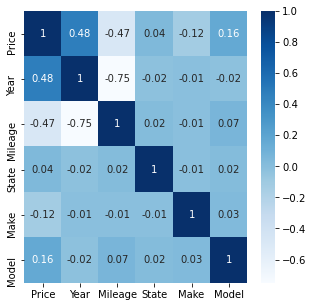

In [13]:
plt.figure(figsize=(5, 5))
corr = dataTraining.corr()
sns.heatmap(round(corr,2), annot=True, cmap="Blues", annot_kws={'size': 10})
plt.show()

In [14]:
dataTraining.head()

,Price,Year,Mileage,State,Make,Model
0,34995,2017,9913,9,17,489
1,37895,2015,20578,35,6,448
2,18430,2012,83716,43,2,499
3,24681,2014,28729,35,5,398
4,26998,2013,64032,5,17,489


In [15]:
dataTraining.groupby('Model').Price.mean()

Model
0      15447.912037
1      18216.069977
2      22545.944162
3      34821.419431
4      28644.583333
           ...     
520    42303.085714
521     8858.897436
522    10001.948718
523     9259.902778
524     8313.222222
Name: Price, Length: 525, dtype: float64

<AxesSubplot:xlabel='Year'>

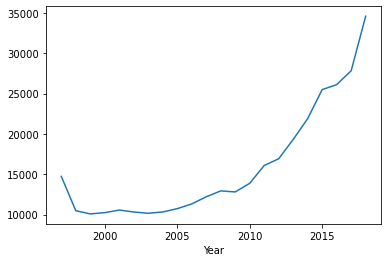

In [16]:
dataTraining.groupby('Year').Price.mean().plot()

In [17]:
X=dataTraining.iloc[:,1:6]
y=dataTraining.Price

#Partimos los datasets en Train y Test
XTrain, XTest, yTrain, yTest = train_test_split(X, y, test_size=0.33, random_state=0)

In [18]:
#Regresion Lineal simple

linmod=LinearRegression()
linmod.fit(XTrain,yTrain)

# Información del modelo
# ==============================================================================
print("Intercept:", linmod.intercept_)
print("Coeficiente:", list(zip(X.columns, linmod.coef_.flatten(), )))
print("Coeficiente de determinación R^2:", linmod.score(X, y))

Intercept: -1710279.0107680052
Coeficiente: [('Year', 861.0017182627707), ('Mileage', -0.07632339047626777), ('State', 34.15906639338926), ('Make', -129.48926101686507), ('Model', 13.695399541664889)]
Coeficiente de determinación R^2: 0.31022944844117784


In [19]:
#Random Forest

# Definición de modelo Random Forest para un problema de regresión
clf = RandomForestRegressor(random_state=1, n_jobs=-1 )
clf.fit(XTrain, yTrain)

prediccion=clf.predict(XTest)

mse = metrics.mean_squared_error(yTest, prediccion, squared=False)
print('El mean_squared_error en la muestra de test es:')
print(mse)

El mean_squared_error en la muestra de test es:
3808.0782097420347


max_mse:  -13480878.128997356
feat_max_mse:  21


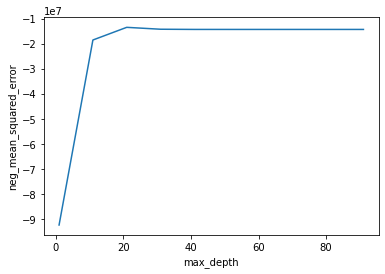

In [17]:
# Calibración de max_depth

# Creación de lista de valores para iterar sobre diferentes valores de max_depth
depth_range =  range(1, 100,10)

# Definición de lista para almacenar la exactitud (accuracy) promedio para cada valor de max_depth
mse_scores = []

# Uso de un 5-fold cross-validation para cada valor de max_depth
for depth in depth_range:
    clf = RandomForestRegressor(max_depth=depth, random_state=1, n_jobs=-1)
    mse_scores.append(cross_val_score(clf, XTrain, yTrain, cv=5, scoring='neg_mean_squared_error').mean())
    
plt.plot(depth_range, mse_scores)
plt.xlabel('max_depth')
plt.ylabel('neg_mean_squared_error')

# Mejores parámetros
max_mse_depth = np.max(mse_scores)
depth_max_mse = depth_range[mse_scores.index(max_mse_depth)]
print("max_mse: ", max_mse_depth)
print("feat_max_mse: ", depth_max_mse)

max_mse:  -13286553.278757099
feat_max_mse:  300


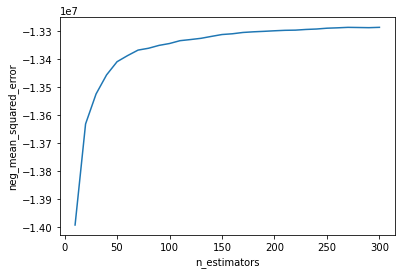

In [23]:
#Calibración de n_estimators

# Creación de lista de valores para iterar sobre diferentes valores de n_estimators
estimator_range =  range(10, 310, 10)

# Definición de lista para almacenar la exactitud (accuracy) promedio para cada valor de n_estimators
mse_scores = []

# Uso de un 5-fold cross-validation para cada valor de n_estimators
for estimator in estimator_range:
    clf = RandomForestRegressor(max_depth=20, n_estimators=estimator, random_state=1, n_jobs=-1)
    mse_scores.append(cross_val_score(clf, XTrain, yTrain, cv=5, scoring='neg_mean_squared_error').mean())

plt.plot(estimator_range, mse_scores)
plt.xlabel('n_estimators')
plt.ylabel('neg_mean_squared_error')

# Mejores parámetros
max_mse_estimator = np.max(mse_scores)
estimator_max_mse = estimator_range[mse_scores.index(max_mse_estimator)]
print("max_mse: ", max_mse_estimator)
print("feat_max_mse: ", estimator_max_mse)

max_mse:  -13097332.05338455
feat_max_mse:  4


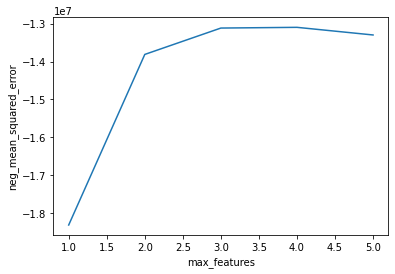

In [24]:
# Calibración de max_features

# Creación de lista de valores para iterar sobre diferentes valores de max_features
feature_range = range(1, len(XTrain.columns)+1)

# Definición de lista para almacenar la exactitud (accuracy) promedio para cada valor de max_features
mse_scores = []

# Uso de un 5-fold cross-validation para cada valor de max_features
for feature in feature_range:
    clf = RandomForestRegressor(max_depth=20, n_estimators=200,max_features=feature, random_state=1, n_jobs=-1)
    mse_scores.append(cross_val_score(clf, XTrain, yTrain, cv=5, scoring='neg_mean_squared_error').mean())

# Gráfica del desempeño del modelo vs la cantidad de max_features
plt.plot(feature_range, mse_scores)
plt.xlabel('max_features')
plt.ylabel('neg_mean_squared_error')

# Mejores parámetros
max_mse_feature = np.max(mse_scores)
feature_max_mse = feature_range[mse_scores.index(max_mse_feature)]
print("max_mse: ", max_mse_feature)
print("feat_max_mse: ", feature_max_mse)

In [20]:
#Random Forest Calibrado

# Definición de modelo Random Forest para un problema de regresión
clf = RandomForestRegressor(max_depth=21, n_estimators=300, max_features=4, random_state=1, n_jobs=-1 )
clf.fit(XTrain, yTrain)

prediccion=clf.predict(XTest)

mse = metrics.mean_squared_error(yTest, prediccion, squared=False)
print('El mean_squared_error en la muestra de test es:')
print(mse)

El mean_squared_error en la muestra de test es:
3648.5144181799037


In [21]:
#XGBoost

clf = XGBRegressor(
    random_state=1)

# Entrenamiento (fit) y desempeño del modelo XGBClassifier
clf.fit(XTrain, yTrain)
y_pred = clf.predict(XTest)
mse= metrics.mean_squared_error(y_pred, yTest.values, squared=False)
print('El mean_squared_error en la muestra de test es:')
print(mse)



El mean_squared_error en la muestra de test es:
3700.4343455071476


max_mse:  -13535375.751241371
feat_max_mse:  0.29


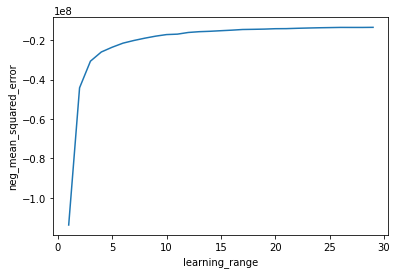

In [211]:
# Calibración de learning_rate

# Creación de lista de valores para iterar sobre diferentes valores de learning_rate
learning_range = range(1, 30, 1)

# Definición de lista para almacenar la exactitud (accuracy) promedio para cada valor de learning_rate
mse_scores = []

# Uso de un 5-fold cross-validation para cada valor de learning_rate
for l in learning_range:
    clf = XGBRegressor(learning_rate= l/100, random_state=1)
    mse_scores.append(cross_val_score(clf, XTrain, yTrain, cv=5, scoring='neg_mean_squared_error').mean())

# Gráfica del desempeño del modelo vs learning_rate
plt.plot(learning_range, mse_scores)
plt.xlabel('learning_range')
plt.ylabel('neg_mean_squared_error')


# Mejores parámetros
max_mse_lrate = np.max(mse_scores)
lrate_max_mse = learning_range[mse_scores.index(max_mse_lrate)]/100
print("max_mse: ", max_mse_lrate)
print("feat_max_mse: ", lrate_max_mse)

max_mse:  -13535375.751241371
pgamma_max_mse:  0


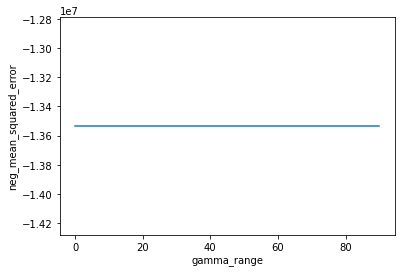

In [212]:
# Calibración de gamma

# Creación de lista de valores para iterar sobre diferentes valores de gamma
gamma_range = range(0, 100, 10)

# Definición de lista para almacenar la exactitud (accuracy) promedio para cada valor de gamma
mse_scores = []

# Uso de un 5-fold cross-validation para cada valor de gamma
for g in gamma_range:
    clf = XGBRegressor(learning_rate=0.29, gamma= g, random_state=1)
    mse_scores.append(cross_val_score(clf, XTrain, yTrain, cv=5, scoring='neg_mean_squared_error').mean())

# Gráfica del desempeño del modelo vs gamma
plt.plot(gamma_range, mse_scores)
plt.xlabel('gamma_range')
plt.ylabel('neg_mean_squared_error')

# Mejores parámetros
max_mse_pgamma = np.max(mse_scores)
pgamma_max_mse = gamma_range[mse_scores.index(max_mse_pgamma)]
print("max_mse: ", max_mse_pgamma)
print("pgamma_max_mse: ", pgamma_max_mse)

Text(0, 0.5, 'neg_mean_squared_error')

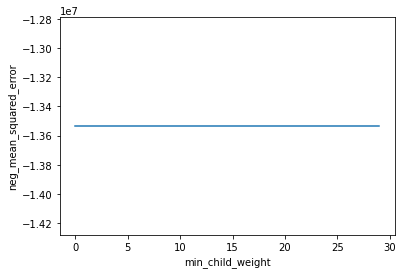

In [213]:
# Calibración de min_child_weight

# Creación de lista de valores para iterar sobre diferentes valores de min_child_weight
rango = range(0, 30, 1)

# Definición de lista para almacenar la exactitud (accuracy) promedio para cada valor de learning_rate
mse_scores = []

# Uso de un 5-fold cross-validation para cada valor de learning_rate
for l in rango:
    clf = XGBRegressor(learning_rate=0.29, min_child_weight= l/100, random_state=1)
    mse_scores.append(cross_val_score(clf, XTrain, yTrain, cv=5, scoring='neg_mean_squared_error').mean())

# Gráfica del desempeño del modelo vs learning_rate
plt.plot(rango, mse_scores)
plt.xlabel('min_child_weight')
plt.ylabel('neg_mean_squared_error')

max_mse:  -12616643.60544074
max_depth_max_mse:  10


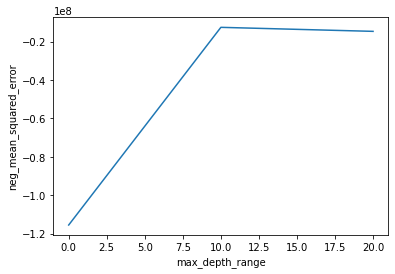

In [25]:
# Calibración de max_depth

# Creación de lista de valores para iterar sobre diferentes valores de gamma
max_depth_range = range(0, 30, 10)

# Definición de lista para almacenar la exactitud (accuracy) promedio para cada valor de gamma
mse_scores = []

# Uso de un 5-fold cross-validation para cada valor de gamma
for m in max_depth_range:
    clf = XGBRegressor(learning_rate=0.29, max_depth= m, random_state=1)
    mse_scores.append(cross_val_score(clf, XTrain, yTrain, cv=5, scoring='neg_mean_squared_error').mean())

# Gráfica del desempeño del modelo vs gamma
plt.plot(max_depth_range, mse_scores)
plt.xlabel('max_depth_range')
plt.ylabel('neg_mean_squared_error')

# Mejores parámetros
max_mse_pgamma = np.max(mse_scores)
pgamma_max_mse = max_depth_range[mse_scores.index(max_mse_pgamma)]
print("max_mse: ", max_mse_pgamma)
print("max_depth_max_mse: ", pgamma_max_mse)

max_mse:  -15120566.841639157
max_depth_max_mse:  60


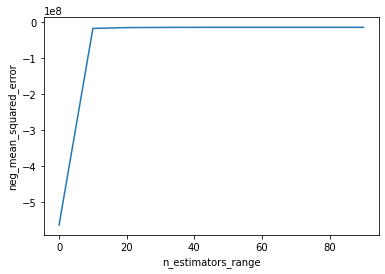

In [166]:
# Calibración de n_estimators

# Creación de lista de valores para iterar sobre diferentes valores de gamma
n_estimators_range = range(0, 100, 10)

# Definición de lista para almacenar la exactitud (accuracy) promedio para cada valor de gamma
mse_scores = []

# Uso de un 5-fold cross-validation para cada valor de gamma
for e in n_estimators_range:
    clf = XGBRegressor(learning_rate=0.29, max_depth= 10, n_estimators=e, random_state=1)
    mse_scores.append(cross_val_score(clf, XTrain, yTrain, cv=5, scoring='neg_mean_squared_error').mean())

# Gráfica del desempeño del modelo vs gamma
plt.plot(n_estimators_range, mse_scores)
plt.xlabel('n_estimators_range')
plt.ylabel('neg_mean_squared_error')

# Mejores parámetros
max_mse_pgamma = np.max(mse_scores)
pgamma_max_mse = n_estimators_range[mse_scores.index(max_mse_pgamma)]
print("max_mse: ", max_mse_pgamma)
print("max_depth_max_mse: ", pgamma_max_mse)

In [ ]:
# Calibración de colsample_bytree

# Creación de lista de valores para iterar sobre diferentes valores de learning_rate
colsample_bytree_range = range(1, 30, 1)

# Definición de lista para almacenar la exactitud (accuracy) promedio para cada valor de learning_rate
mse_scores = []

# Uso de un 5-fold cross-validation para cada valor de learning_rate
for c in colsample_bytree_range:
    clf = XGBRegressor(learning_rate=0.29, max_depth= 10, n_estimators=60, subsample= 0.29, colsample_bytree=c , random_state=1)
    mse_scores.append(cross_val_score(clf, XTrain, yTrain, cv=5, scoring='neg_mean_squared_error').mean())

# Gráfica del desempeño del modelo vs learning_rate
plt.plot(colsample_bytree_range, mse_scores)
plt.xlabel('colsample_bytree_range')
plt.ylabel('neg_mean_squared_error')


# Mejores parámetros
max_mse_lrate = np.max(mse_scores)
lrate_max_mse = colsample_bytree_range[mse_scores.index(max_mse_lrate)]/100
print("max_mse: ", max_mse_lrate)
print("feat_max_mse: ", lrate_max_mse)

max_mse:  -15793464.325290602
feat_max_mse:  0.29


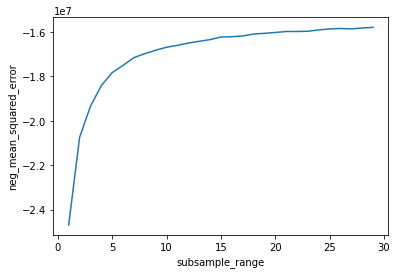

In [167]:
# Calibración de subsample

# Creación de lista de valores para iterar sobre diferentes valores de learning_rate
subsample_range = range(1, 30, 1)

# Definición de lista para almacenar la exactitud (accuracy) promedio para cada valor de learning_rate
mse_scores = []

# Uso de un 5-fold cross-validation para cada valor de learning_rate
for s in subsample_range:
    clf = XGBRegressor(learning_rate=0.29, max_depth= 10, n_estimators=e, subsample= s/100, random_state=1)
    mse_scores.append(cross_val_score(clf, XTrain, yTrain, cv=5, scoring='neg_mean_squared_error').mean())

# Gráfica del desempeño del modelo vs learning_rate
plt.plot(subsample_range, mse_scores)
plt.xlabel('subsample_range')
plt.ylabel('neg_mean_squared_error')


# Mejores parámetros
max_mse_lrate = np.max(mse_scores)
lrate_max_mse = subsample_range[mse_scores.index(max_mse_lrate)]/100
print("max_mse: ", max_mse_lrate)
print("feat_max_mse: ", lrate_max_mse)

In [22]:
#XGBoost Calibrado

clf = XGBRegressor(
    learning_rate=0.29,
    #gamma=
    #min_child_weight=0.5,
    max_depth=10,
    n_estimators=60, 
    #colsample_bytree=0.8, 
    subsample=0.29, 
    random_state=1)

# Entrenamiento (fit) y desempeño del modelo XGBClassifier
clf.fit(XTrain, yTrain)
y_pred = clf.predict(XTest)
mse= metrics.mean_squared_error(y_pred, yTest.values, squared=False)
print('El mean_squared_error en la muestra de test es:')
print(mse)


El mean_squared_error en la muestra de test es:
3726.438332628222


In [27]:
# Predicción del conjunto de test

dataTesting['State'] = LabelEncoder().fit_transform(dataTesting['State'])
dataTesting['Make'] = LabelEncoder().fit_transform(dataTesting['Make'])
dataTesting['Model'] = LabelEncoder().fit_transform(dataTesting['Model'])

Dataset=dataTesting.iloc[:,:]

# Definición de modelo Random Forest para un problema de regresión
clf = RandomForestRegressor(max_depth=21, n_estimators=300, max_features=4, random_state=1, n_jobs=-1)
clf.fit(XTrain, yTrain)

prediccion=clf.predict(Dataset)

y_pred = pd.DataFrame(prediccion, index=Dataset.index, columns=['Price'])
y_pred

,Price
ID,
0,18515.479378
1,34212.540709
2,23960.747300
3,9863.857755
4,31189.176238
...,...
99995,22706.482036
99996,39819.032056
99997,19819.542257


In [24]:
# Guardar predicciones en formato exigido en la competencia de kaggle
y_pred.to_csv('test_submission.csv', index_label='ID')
y_pred.head()

,Price
ID,
0,18515.479378
1,34212.540709
2,23960.747300
3,9863.857755
4,31189.176238
